## Base Model

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test_noLabel.csv')

data_train.head()

,ID,位置,出租方式,区,卧室数量,卫的数量,厅的数量,地铁站点,地铁线路,小区名,小区房屋出租数量,居住状态,总楼层,房屋朝向,房屋面积,时间,楼层,装修情况,距离,Label
0,0,118.0,NaN,11.0,1,1,1,4.0,2.0,3072,128.90625,NaN,23.636364,东南,86.279378,1,2,NaN,76.416667,5.602716
1,1,100.0,NaN,10.0,1,0,0,5.8,4.0,3152,132.81250,NaN,38.181818,东,170.456802,1,1,NaN,70.916667,16.977929
2,2,130.0,NaN,12.0,2,2,1,3.7,5.0,5575,42.96875,NaN,29.090909,东南,105.925190,1,0,NaN,57.250000,8.998302
3,3,90.0,NaN,7.0,3,2,2,6.3,2.0,3103,85.93750,NaN,58.181818,南,191.989407,1,2,NaN,65.833333,5.602716
4,4,31.0,NaN,3.0,2,1,1,NaN,NaN,5182,214.84375,NaN,54.545455,东北,104.270109,1,0,NaN,NaN,7.300509


In [3]:
data_test.head()

,ID,位置,出租方式,区,卧室数量,卫的数量,厅的数量,地铁站点,地铁线路,小区名,小区房屋出租数量,居住状态,总楼层,房屋朝向,房屋面积,时间,楼层,装修情况,距离
0,196539,5.0,1.0,10.0,2,1,1,NaN,NaN,6011,382.81250,3.0,60.000000,东,71.168487,4,1,6.0,NaN
1,196540,0.0,NaN,3.0,2,1,1,NaN,NaN,1697,152.34375,NaN,47.272727,东,74.478649,4,1,NaN,NaN
2,196541,9.0,NaN,10.0,3,2,2,7.4,4.0,754,207.03125,NaN,70.909091,东南,140.681893,4,2,NaN,40.083333
3,196542,96.0,NaN,6.0,2,1,1,1.7,5.0,1285,11.71875,NaN,9.090909,南,89.374379,4,0,NaN,38.416667
4,196543,61.0,NaN,6.0,2,1,1,11.4,3.0,4984,35.15625,NaN,21.818182,东南,86.064217,4,1,NaN,59.833333


In [4]:
data_test['Label'] = -1

In [5]:
data_merge = data_train.append(data_test)
data_merge

,ID,位置,出租方式,区,卧室数量,卫的数量,厅的数量,地铁站点,地铁线路,小区名,小区房屋出租数量,居住状态,总楼层,房屋朝向,房屋面积,时间,楼层,装修情况,距离,Label
0,0,118.0,NaN,11.0,1,1,1,4.0,2.0,3072,128.90625,NaN,23.636364,东南,86.279378,1,2,NaN,76.416667,5.602716
1,1,100.0,NaN,10.0,1,0,0,5.8,4.0,3152,132.81250,NaN,38.181818,东,170.456802,1,1,NaN,70.916667,16.977929
2,2,130.0,NaN,12.0,2,2,1,3.7,5.0,5575,42.96875,NaN,29.090909,东南,105.925190,1,0,NaN,57.250000,8.998302
3,3,90.0,NaN,7.0,3,2,2,6.3,2.0,3103,85.93750,NaN,58.181818,南,191.989407,1,2,NaN,65.833333,5.602716
4,4,31.0,NaN,3.0,2,1,1,NaN,NaN,5182,214.84375,NaN,54.545455,东北,104.270109,1,0,NaN,NaN,7.300509
5,5,143.0,NaN,3.0,2,1,1,5.9,3.0,1192,39.06250,NaN,30.909091,南,125.786164,1,2,NaN,49.583333,4.923599
6,6,48.0,NaN,11.0,3,1,1,0.9,2.0,1122,125.00000,NaN,38.181818,南,105.925190,1,0,NaN,19.333333,6.621392
7,7,52.0,NaN,12.0,4,2,2,NaN,NaN,1251,128.90625,NaN,36.363636,南,180.403840,1,2,NaN,NaN,14.091681
8,8,143.0,NaN,3.0,1,1,1,NaN,NaN,4718,246.09375,NaN,30.909091,西南,78.500497,1,2,NaN,NaN,4.584041
9,9,43.0,NaN,10.0,2,2,1,5.8,4.0,2654,218.75000,NaN,89.090909,东南,200.264813,1,2,NaN,40.000000,39.558574


In [6]:
data_merge.isnull().sum()/data_merge.isnull().count()*100

ID           0.000000
位置           0.016217
出租方式        88.449794
区            0.016217
卧室数量         0.000000
卫的数量         0.000000
厅的数量         0.000000
地铁站点        53.218521
地铁线路        53.218521
小区名          0.000000
小区房屋出租数量     0.404639
居住状态        90.261374
总楼层          0.000000
房屋朝向         0.000000
房屋面积         0.000000
时间           0.000000
楼层           0.000000
装修情况        91.021604
距离          53.218521
Label        0.000000
dtype: float64

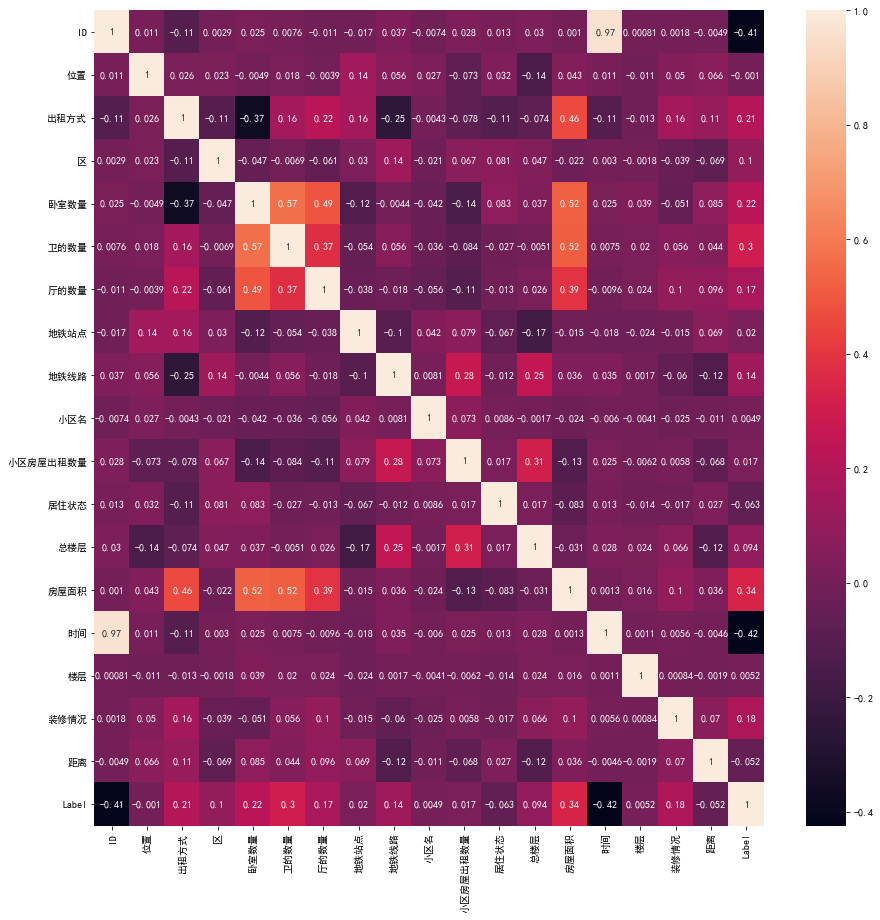

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data_merge.corr(), annot=True)

In [8]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold

In [9]:
sub = data_merge[data_merge['Label'] == -1]['ID'].to_frame()
data = data_merge.drop(['ID', '出租方式', '装修情况', '房屋朝向'], axis=1)
x_train = data[data['Label'] != -1].drop('Label', axis=1)
x_test = data[data['Label'] == -1].drop('Label', axis=1)
y_train = data[data['Label'] != -1]['Label']
print(x_train.shape, x_test.shape, y_train.shape)

(196539, 15) (56279, 15) (196539,)


In [10]:
model = lgb.LGBMRegressor(
        objective='regression',
        max_depth=7,
        learning_rate=0.05,
        n_estimators=500,
        random_state=0,
        metric='rmse'
)

n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
sub['Label'] = 0
feature_importances= pd.DataFrame(index=x_train.columns)

In [11]:
for i, (trn_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    x_train_ = x_train.iloc[trn_idx]
    y_train_ = y_train.iloc[trn_idx]
    x_val_ = x_train.iloc[val_idx]
    y_val_ = y_train.iloc[val_idx]
    
    model.fit(x_train_, y_train_, eval_set=[(x_train_, y_train_), (x_val_, y_val_)],
             eval_metric='rmse',
             early_stopping_rounds=200,
             feature_name=x_train_.columns.tolist(),
             verbose=300)
    sub['Label'] += model.predict(x_test, num_iteration=model.best_iteration_)
    feature_importances[i] = model.feature_importances_

Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.49662	valid_1's rmse: 2.61419
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 2.27812	valid_1's rmse: 2.41846
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.49444	valid_1's rmse: 2.54902
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 2.28651	valid_1's rmse: 2.39428
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.48436	valid_1's rmse: 2.70117
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 2.27404	valid_1's rmse: 2.52534
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.47818	valid_1's rmse: 2.66897
Did not meet early stopping. Best iteration is:
[500]	training's rmse: 2.26749	valid_1's rmse: 2.4806
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.49028	valid_1's rmse: 2.60469

In [12]:
sub['Label'] /= n_splits

In [13]:
sub

,ID,Label
0,196539,4.250690
1,196540,6.047906
2,196541,13.990315
3,196542,6.106851
4,196543,6.375747
5,196544,11.327328
6,196545,8.502291
7,196546,3.563939
8,196547,7.730564
9,196548,6.490564


## 优化

In [14]:
def count_func(data, features):
    for feature in features:
        temp = data.groupby(feature).size().reset_index().rename(columns={0: feature+'_count'})
        data = data.merge(temp, 'left', on=feature)
    return data

data = count_func(data_merge, ['区', '地铁线路', '位置', '距离', '楼层', '地铁站点', '卫的数量', '卧室数量', '厅的数量', '小区名'])

In [15]:
sub = data[data['Label'] == -1]['ID'].to_frame()
data = data.drop(['ID', '出租方式', '装修情况', '房屋朝向'], axis=1)
x_train = data[data['Label'] != -1].drop('Label', axis=1)
x_test = data[data['Label'] == -1].drop('Label', axis=1)
y_train = data[data['Label'] != -1]['Label']
print(x_train.shape, x_test.shape, y_train.shape)

(196539, 25) (56279, 25) (196539,)


In [18]:
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        num_leaves=50,
        random_state=0,
        metric='rmse'
)

n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
sub['Label'] = 0
feature_importances= pd.DataFrame(index=x_train.columns)

In [16]:
np.arange(50, 200, 30)

array([ 50,  80, 110, 140, 170])

### 调参

In [21]:
from sklearn.grid_search import GridSearchCV

params1 = {
    'max_depth': np.arange(4, 8, 2)
#     'num_leaves': np.arange(50, 200, 30)
}

gsearch1 = GridSearchCV(estimator=model, param_grid=params1, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch1.fit(x_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.2min finished


([mean: -6.92660, std: 0.95029, params: {'max_depth': 4},
  mean: -4.72508, std: 0.71393, params: {'max_depth': 6}],
 {'max_depth': 6},
 -4.72508044006266)

In [16]:
from sklearn.grid_search import GridSearchCV

model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        num_leaves=50,
        random_state=0,
        metric='rmse'
)

params2 = {
#     'max_depth': np.arange(4, 8, 2)
    'num_leaves': np.arange(50, 200, 30)
}

gsearch2 = GridSearchCV(estimator=model, param_grid=params2, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch2.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch2.best_params_))
print('最佳模型得分: {0}'.format(gsearch2.best_score_))

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.1min finished


参数最佳值: {'num_leaves': 140}
最佳模型得分: -4.553727054849454


In [19]:
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        metric='rmse',
        num_leaves = 140
)

params3 = {
    'min_child_samples': [18,19,20,21,22],
    'min_child_weight': [0.001,0.002]
}

gsearch3 = GridSearchCV(estimator=model, param_grid=params3, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch3.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch3.best_params_))
print('最佳模型得分: {0}'.format(gsearch3.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.0min finished


参数最佳值: {'min_child_samples': 18, 'min_child_weight': 0.001}
最佳模型得分: -4.615512084778404


In [20]:
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        metric='rmse',
        num_leaves = 140,
        min_child_samples=18,
        min_child_weight = 0.001
)

params4 = {
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}

gsearch4 = GridSearchCV(estimator=model, param_grid=params4, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch4.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch4.best_params_))
print('最佳模型得分: {0}'.format(gsearch4.best_score_))

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 46.7min finished


参数最佳值: {'feature_fraction': 0.9, 'bagging_fraction': 0.6}
最佳模型得分: -4.613830944645005


In [26]:
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        metric='rmse',
        num_leaves = 140,
        min_child_samples=18,
        min_child_weight = 0.001,
        feature_fraction = 0.9,
        bagging_fraction = 0.6
)

params5 = {
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}

gsearch5 = GridSearchCV(estimator=model, param_grid=params5, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch5.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch5.best_params_))
print('最佳模型得分: {0}'.format(gsearch5.best_score_))

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed: 104.7min finished


参数最佳值: {'reg_lambda': 0.001, 'reg_alpha': 0.03}
最佳模型得分: -4.5966462846047875


In [20]:
from sklearn.grid_search import GridSearchCV
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        metric='rmse',
        num_leaves = 140,
        min_child_samples=18,
        min_child_weight = 0.001,
        feature_fraction = 0.9,
        bagging_fraction = 0.6,
        reg_alpha = 0.03,
        reg_lambda = 0.001
)

params6 = {
    'n_estimators': np.arange(200,1000, 200)
}

gsearch6 = GridSearchCV(estimator=model, param_grid=params6, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch6.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch6.best_params_))
print('最佳模型得分: {0}'.format(gsearch6.best_score_))

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.3min finished


参数最佳值: {'n_estimators': 800}
最佳模型得分: -4.5966462846047875


In [21]:
model = lgb.LGBMRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        metric='rmse',
        num_leaves = 140,
        min_child_samples=18,
        min_child_weight = 0.001,
        feature_fraction = 0.9,
        bagging_fraction = 0.6,
        reg_alpha = 0.03,
        reg_lambda = 0.001
)


n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
sub['Label'] = 0
feature_importances= pd.DataFrame(index=x_train.columns)

In [22]:
for i, (trn_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    x_train_ = x_train.iloc[trn_idx]
    y_train_ = y_train.iloc[trn_idx]
    x_val_ = x_train.iloc[val_idx]
    y_val_ = y_train.iloc[val_idx]
    
    model.fit(x_train_, y_train_, eval_set=[(x_train_, y_train_), (x_val_, y_val_)],
             eval_metric='rmse',
             early_stopping_rounds=200,
             feature_name=x_train_.columns.tolist(),
             verbose=300)
    sub['Label'] += model.predict(x_test, num_iteration=model.best_iteration_)
    feature_importances[i] = model.feature_importances_

Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.33172	valid_1's rmse: 2.45489
[600]	training's rmse: 2.06772	valid_1's rmse: 2.24029
Did not meet early stopping. Best iteration is:
[800]	training's rmse: 1.95469	valid_1's rmse: 2.15135
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.35234	valid_1's rmse: 2.44234
[600]	training's rmse: 2.0788	valid_1's rmse: 2.23923
Did not meet early stopping. Best iteration is:
[800]	training's rmse: 1.95794	valid_1's rmse: 2.15211
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.34087	valid_1's rmse: 2.54334
[600]	training's rmse: 2.06687	valid_1's rmse: 2.31255
Did not meet early stopping. Best iteration is:
[800]	training's rmse: 1.94699	valid_1's rmse: 2.21384
Training until validation scores don't improve for 200 rounds.
[300]	training's rmse: 2.33894	valid_1's rmse: 2.53899
[600]	training's rmse: 2.07001	valid_1's rmse: 2.31116


In [23]:
sub['Label'] /= n_splits
sub

,ID,Label
196539,196539,4.131164
196540,196540,5.931150
196541,196541,15.197405
196542,196542,6.140315
196543,196543,6.457100
196544,196544,11.142566
196545,196545,9.189164
196546,196546,3.398564
196547,196547,7.624359
196548,196548,6.644106


In [24]:
sub.to_csv('submission.csv', index=False)

In [55]:
feature_importances

,0,1,2,3,4,5,6,7,8,9
位置,1949,2026,1989,1904,1983,1859,1938,2035,1861,2033
区,637,659,605,661,632,654,617,670,623,659
卧室数量,1327,1256,1285,1274,1328,1296,1274,1240,1290,1341
卫的数量,946,955,1004,974,1007,964,950,1009,987,952
厅的数量,518,583,637,563,550,565,582,620,581,573
地铁站点,1073,1065,973,932,969,1043,1083,1004,1037,1034
地铁线路,331,297,330,310,318,319,331,341,314,297
小区名,2593,2639,2602,2631,2636,2658,2635,2674,2592,2618
小区房屋出租数量,942,1046,968,930,865,948,1017,990,910,1009
居住状态,340,382,332,357,329,341,354,340,313,328


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

model = xgb.XGBRegressor(
        max_depth=6,
        learning_rate=0.05,
        n_estimators=800,
        random_state=0,
        eval_metric='rmse',
        nthread=4,
        n_jobs = -1,
        subsample = 0.8
)

params1 = {
    'max_depth': np.arange(3, 10, 2),
    'min_child_weight': np.arange(1, 6, 2)
}

gsearch1 = GridSearchCV(estimator=model, param_grid=params1, scoring='neg_mean_squared_error', cv=10, verbose=1)
gsearch1.fit(x_train, y_train)
print('参数最佳值: {0}'.format(gsearch1.best_params_))
print('最佳模型得分: {0}'.format(gsearch1.best_score_))

c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python35\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
n_splits = 10
folds = KFold(n_splits=n_splits, shuffle=True, random_state=0)
sub['Label'] = 0
feature_importances= pd.DataFrame(index=x_train.columns)

for i, (trn_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    x_train_ = x_train.iloc[trn_idx]
    y_train_ = y_train.iloc[trn_idx]
    x_val_ = x_train.iloc[val_idx]
    y_val_ = y_train.iloc[val_idx]
    
    model.fit(x_train_, y_train_, eval_set=[(x_train_, y_train_), (x_val_, y_val_)],
             early_stopping_rounds=200,
             verbose=300)
    sub['Label'] += model.predict(x_test)
    feature_importances[i] = model.feature_importances_

In [60]:
sub['Label'] /= n_splits
sub

,ID,Label
196539,196539,4.102537
196540,196540,5.894586
196541,196541,14.785981
196542,196542,6.180067
196543,196543,6.559509
196544,196544,11.137867
196545,196545,9.429597
196546,196546,3.460855
196547,196547,7.522976
196548,196548,6.461363


In [61]:
sub.to_csv('submission.csv', index=False)